# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

# Import Libraries

In [22]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [45]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier




# Load the Dataset and make EDA

- Print the head, tail, describe, info, shape.

In [24]:
df = pd.read_csv("soil_measures.csv")
df.head()


,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [25]:
df.tail()

,N,P,K,ph,crop
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee
2199,104,18,30,6.779833,coffee


In [26]:
df.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [28]:
df.shape

(2200, 5)

In [29]:
df.value_counts()

N    P    K    ph        crop       
0    5    36   6.152907  pomegranate    1
69   60   54   6.989927  papaya         1
     37   42   7.073454  rice           1
     46   41   5.012140  rice           1
     47   40   6.130136  jute           1
                                       ..
26   126  195  5.878569  apple          1
     122  202  5.617227  apple          1
     121  201  6.162034  apple          1
     80   83   7.528600  chickpea       1
140  45   15   5.801048  cotton         1
Length: 2200, dtype: int64

In [30]:
df.duplicated().sum()

0

# Check the number of classes in the target label

In [31]:
unique_classes = df['crop'].unique()

num_classes = len(unique_classes)
print(f"Number of classes in 'crop': {num_classes}")

Number of classes in 'crop': 22


In [32]:
unique_classes

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Check is there missing data

In [33]:
df.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

# Train test split

- Test size is 20%

In [34]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and test data
X_scaled = scaler.fit_transform(X)

# Now, X_scaled contains the normalized features

# Perform train-test split with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Continue with the rest of your modeling, training, and evaluation steps...


In [35]:
#features (X) and target variable (y)
X = df.drop('crop', axis=1)
y = df['crop']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1760, 4) (1760,)
Testing set shape: (440, 4) (440,)


# Train a multiclass logistic regression model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [36]:
#----------------------logistic regression model----------------------
#1-Train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 2-Make predictions on the test set
y_pred = model.predict(X_test)

#3-Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#4-Evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.5841
F1 Score: 0.5297
Precision: 0.6040
Recall: 0.5841

Confusion Matrix:
[[ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  6  0  0  0  3  0  0  8  0  0]
 [ 0  0  0  0  0  9  7  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  3  0  0  8  0  0  0  0  0  0  2  0  1  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  1  0  0  4  0  0]
 [ 0  0  1  0  0 

# Train a SVM model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [38]:
#----------------------SVM model----------------------
#1-Train the SVM Model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# 2-Make predictions on the test set
y_pred = model.predict(X_test)

# 3-Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 4-Evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.6114
F1 Score: 0.5623
Precision: 0.5916
Recall: 0.6114

Confusion Matrix:
[[ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0 11  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0 13  2  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 12  0  0  0  0  0  0  0  0  2  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  2  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  0  0 16  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0 13  0  2  0  0  0  0  2  0  0]
 [ 0  0  1  0  0 

# Train a Decision tree model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [41]:
#----------------------Decision Tree model----------------------
# 1-Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 2-Make predictions on the test set
y_pred = model.predict(X_test)

# 3-Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#4-Evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.7773
F1 Score: 0.7793
Precision: 0.7872
Recall: 0.7773

Confusion Matrix:
[[16  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  3  0  0  1  0  0  0  0  2  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  2  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 16  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 13  0  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 11  1  0  0  1  0  0  0  0  7  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  5  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0 12  1  1  0  0  0  0  1  0  0]
 [ 0  0  1  0  0 

# Train a Random Forest, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [44]:
#----------------------Random Forest model----------------------
#1-Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 2-Make predictions on the test set
y_pred = model.predict(X_test)

# 3-Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 4-Evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8159
F1 Score: 0.8134
Precision: 0.8230
Recall: 0.8159

Confusion Matrix:
[[15  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  3  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 16  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0 15  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  8  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0 14  1  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 

# Train a default KNN model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [46]:
#----------------------KNN model----------------------
# 1-Train the KNN model (default k=5)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# 2-Make predictions on the test set
y_pred = model.predict(X_test)

# 3-Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 4-Evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.7432
F1 Score: 0.7412
Precision: 0.7626
Recall: 0.7432

Confusion Matrix:
[[14  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  3  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 16  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  2  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0 14  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 

# Try different values of K in the KNN model and select the best one.

- Based on the accuracy.

In [52]:
# Trying differnt valuesof k to see what is the best
k_values = [1,3, 2, 7,8,9 , 10, 11, 12, 13, 14,25,50,100]

best_k = None
best_accuracy = 0

for k in k_values:

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy:.4f}")

    # Update the best_k and best_accuracy if the current model is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Print the best k and its corresponding accuracy
print(f"\nBest k: {best_k} with Accuracy: {best_accuracy:.4f}")


Accuracy for k=1: 0.7432
Accuracy for k=3: 0.7409
Accuracy for k=2: 0.7386
Accuracy for k=7: 0.7432
Accuracy for k=8: 0.7477
Accuracy for k=9: 0.7614
Accuracy for k=10: 0.7500
Accuracy for k=11: 0.7432
Accuracy for k=12: 0.7432
Accuracy for k=13: 0.7409
Accuracy for k=14: 0.7341
Accuracy for k=25: 0.7295
Accuracy for k=50: 0.6955
Accuracy for k=100: 0.6364

Best k: 9 with Accuracy: 0.7614


In [54]:
error_rate = []

for i in range(1, 40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

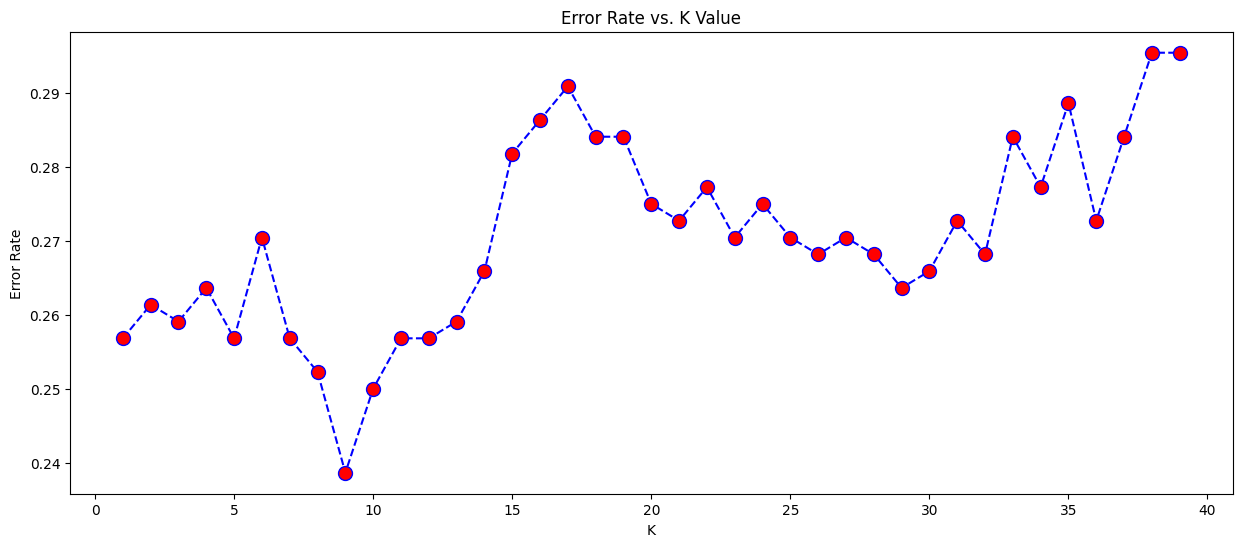

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(
    range(1,40),error_rate,color='blue',
    linestyle='dashed',
    marker='o',
    markerfacecolor='red',
    markersize=10
)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##9 is the best accuracy